In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score

In [2]:
#Data Load
dataf = pd.read_csv('../Datasets/RAPTOR_all_seasons.csv')

In [3]:
df = dataf[((dataf['G']>48)&(dataf['PTS']>13.5)&(dataf['MP']>30)
           &(dataf['AST']>1)&(dataf['TRB']>3)&(dataf['FG%']>0.37))]
df['Odds'] = -df['Odds']

C:\Users\xx049\AppData\Local\Temp\ipykernel_10776\1478298029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Odds'] = -df['Odds']


In [4]:
df2022 = df[df['Season'] == 2022]

In [5]:
df = df[(df['Season'] >= 2007) & (df['Season'] <= 2021)]

In [6]:
df

,Unnamed: 0,Season,Rank,Player,Pos,Age,G,MP,PTS,AST,...,First,Pts Won,Pts Max,Share,MVP,Raptor Offense,Raptor Defense,Predator Offense,Predator Defense,Odds
0,0,2007,1,Dirk Nowitzki,PF,28,78,36.2,24.6,3.4,...,83,1138,1290,0.882,1,2.169240,1.030291,2.558710,1.427014,-800
1,1,2007,2,Steve Nash,PG,32,76,35.3,18.6,11.6,...,44,1013,1290,0.785,0,7.029865,-1.873767,6.812993,-2.210570,-1000
2,2,2007,3,Kobe Bryant,SG,28,77,40.8,31.6,5.4,...,2,521,1290,0.404,0,3.346244,-0.523628,3.457525,-0.395470,-500
3,3,2007,4,Tim Duncan,C,30,80,34.1,20.0,3.4,...,0,286,1290,0.222,0,2.729091,3.926063,3.008572,3.244549,-600
4,4,2007,5,LeBron James,SF,22,78,40.9,27.3,6.0,...,0,183,1290,0.142,0,4.870715,3.108085,4.901036,2.817517,-250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,2021,8,Julius Randle,PF,26,71,37.6,24.1,6.0,...,0,20,1010,0.020,0,-6.952186,0.315181,-7.247945,-0.803198,-100000
202,202,2021,10,Rudy Gobert,C,28,71,30.8,14.3,1.3,...,0,8,1010,0.008,0,0.997255,3.677359,0.271345,4.007218,-20000
203,203,2021,11,Russell Westbrook,PG,32,65,36.4,22.2,11.7,...,0,5,1010,0.005,0,-1.215381,-5.131705,3.167448,-6.440380,-10000
204,204,2021,12,Ben Simmons,PG,24,58,32.4,14.3,6.9,...,0,3,1010,0.003,0,3.654631,0.583405,1.949010,1.032364,-8000


In [7]:
column_names = df.columns
print(column_names)

Index(['Unnamed: 0', 'Season', 'Rank', 'Player', 'Pos', 'Age', 'G', 'MP',
       'PTS', 'AST', 'TRB', 'STL', 'BLK', 'FG%', 'eFG%', 'FT%', 'PF', 'WS',
       'WS/48', 'First', 'Pts Won', 'Pts Max', 'Share', 'MVP',
       'Raptor Offense', 'Raptor Defense', 'Predator Offense',
       'Predator Defense', 'Odds'],
      dtype='object')


In [8]:
#Feature Selections
features =  ['G', 'PTS','WS/48', 'eFG%','TRB', 'Raptor Offense','Raptor Defense','Predator Offense','Predator Defense', 'Odds']
X = df[features]

In [9]:
#Setting win as the target
df['Rank'] = df['Rank'].str.replace('T', '').astype(float)
y = df['Share']

In [10]:
#Dataset Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Bayesian Model

In [11]:
#Bayesian Training
bayesian_model = BayesianRidge()

In [12]:
bayesian_model.fit(X_train, y_train)

BayesianRidge()

In [13]:
#Run predictions
y_pred_bayesian = bayesian_model.predict(X_test)

Bayesian Ridge Model Accuracy (R-Squared)): 40.99%


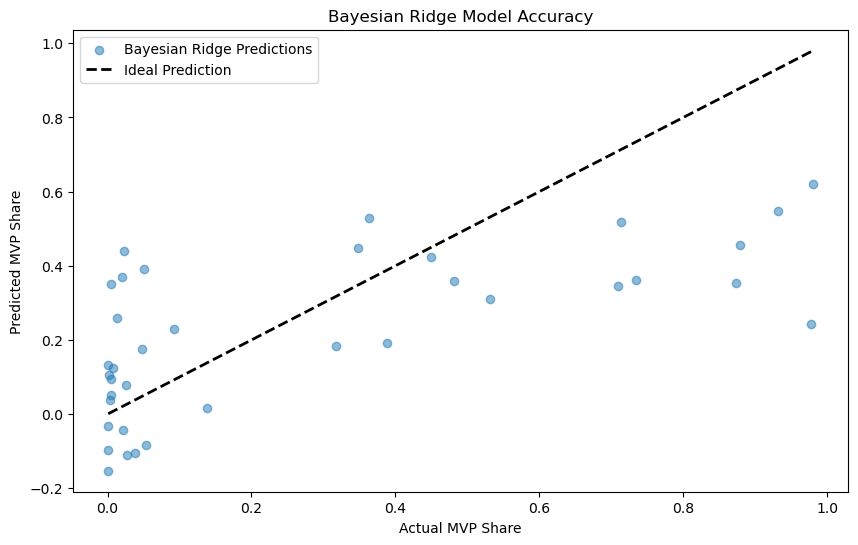

In [14]:
#Evaluation
r2_bayesian = r2_score(y_test, y_pred_bayesian)
print(f"Bayesian Ridge Model Accuracy (R-Squared)): {r2_bayesian * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bayesian, alpha=0.5, label='Bayesian Ridge Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual MVP Share')
plt.ylabel('Predicted MVP Share')
plt.title('Bayesian Ridge Model Accuracy')
plt.legend()
plt.show()

In [15]:
#Calculate correlations
correlation_matrix = df[features + ['Share']].corr()

In [16]:
#Select correlations of features with the target variable
target_correlations = correlation_matrix['Share'].drop('Share')

In [17]:
#Select correlations of features with the target variable
target_correlations = correlation_matrix['Share'].drop('Share')

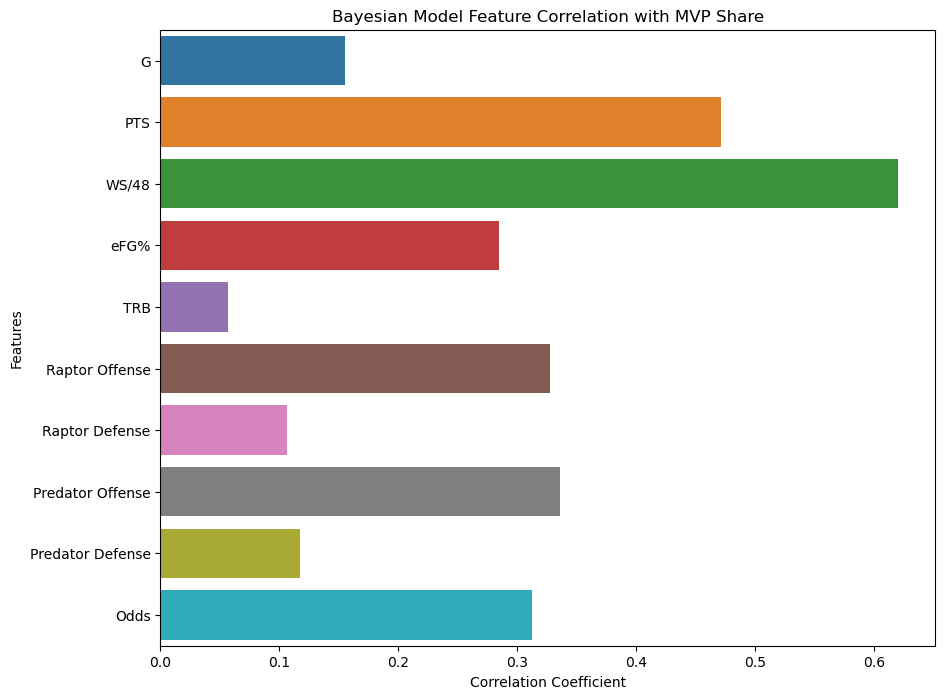

In [18]:
# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=target_correlations.values, y=target_correlations.index)
plt.title('Bayesian Model Feature Correlation with MVP Share')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [19]:
X_2022 = df2022[features]
#Run predictions
y_pred_2022 = bayesian_model.predict(X_2022)

#Making Dataframe
predicted_shares_2022 = pd.DataFrame({
    'Player': df2022['Player'],
    'MVP': y_pred_2022,
    'Actual Winner': df2022['MVP']
})

In [20]:
# Display the Winner 
predicted_winner_sorted = predicted_shares_2022.sort_values(by='MVP', ascending=False)


predicted_winner = predicted_winner_sorted.head(3)
print(predicted_winner)

                    Player       MVP  Actual Winner
208           Nikola Jokic  0.651160              1
210  Giannis Antetokounmpo  0.563835              0
209            Joel Embiid  0.481360              0


Lasso Regression Model

In [21]:
from sklearn.linear_model import Lasso

In [22]:
#Lasso Training
lasso_model = Lasso(alpha=0.01)

In [23]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [24]:
y_pred_lasso = lasso_model.predict(X_test)

In [25]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print(coefficients)

            Feature   Coefficient
0                 G  6.921669e-03
1               PTS  2.660460e-02
2             WS/48  0.000000e+00
3              eFG%  0.000000e+00
4               TRB  1.033306e-02
5    Raptor Offense  1.713273e-02
6    Raptor Defense  0.000000e+00
7  Predator Offense  0.000000e+00
8  Predator Defense  6.172882e-03
9              Odds  8.783132e-07


Lasso Model Accuracy (R-squared)) 32.54%


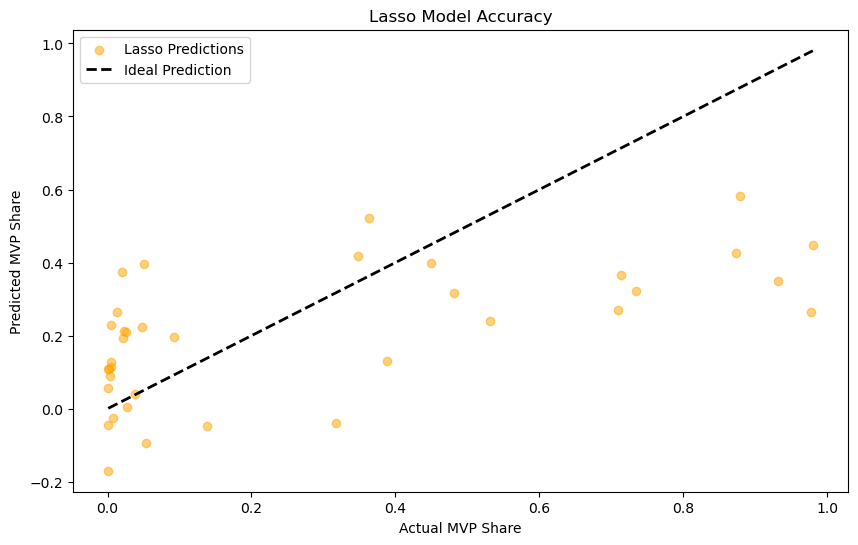

In [26]:

r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Model Accuracy (R-squared)) {r2_lasso * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='orange', label='Lasso Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual MVP Share')
plt.ylabel('Predicted MVP Share')
plt.title('Lasso Model Accuracy')
plt.legend()
plt.show()

In [27]:
#Run predictions
y_pred_2022_lasso = lasso_model.predict(X_2022)

#Making Dataframe
predicted_shares_2022_lasso = pd.DataFrame({
    'Player': df2022['Player'],
    'Predicted Share': y_pred_2022,
    'Actual Share': df2022['Share']
})

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [29]:
#Feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
#neural network model
model = Sequential()
model.add(Input(shape=(len(features),)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, verbose=1)

Epoch 1/1000
5/5 [==============================] - 1s 2ms/step - loss: 0.1167
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0761
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0553
Epoch 4/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 5/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0384
Epoch 6/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 7/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 8/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 9/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0261
Epoch 10/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0244
Epoch 11/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 12/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 13/1000
5/5 [==============================

5/5 [==============================] - 0s 1ms/step - loss: 7.2053e-04
Epoch 104/1000
5/5 [==============================] - 0s 1ms/step - loss: 6.5440e-04
Epoch 105/1000
5/5 [==============================] - 0s 2ms/step - loss: 6.3530e-04
Epoch 106/1000
5/5 [==============================] - 0s 2ms/step - loss: 6.0073e-04
Epoch 107/1000
5/5 [==============================] - 0s 2ms/step - loss: 5.8552e-04
Epoch 108/1000
5/5 [==============================] - 0s 2ms/step - loss: 5.7473e-04
Epoch 109/1000
5/5 [==============================] - 0s 2ms/step - loss: 5.4128e-04
Epoch 110/1000
5/5 [==============================] - 0s 1ms/step - loss: 5.1045e-04
Epoch 111/1000
5/5 [==============================] - 0s 2ms/step - loss: 4.9053e-04
Epoch 112/1000
5/5 [==============================] - 0s 2ms/step - loss: 4.5769e-04
Epoch 113/1000
5/5 [==============================] - 0s 2ms/step - loss: 4.4870e-04
Epoch 114/1000
5/5 [==============================] - 0s 1ms/step - loss: 4.0706

5/5 [==============================] - 0s 1ms/step - loss: 7.2649e-06
Epoch 200/1000
5/5 [==============================] - 0s 1ms/step - loss: 7.1789e-06
Epoch 201/1000
5/5 [==============================] - 0s 1ms/step - loss: 6.9589e-06
Epoch 202/1000
5/5 [==============================] - 0s 1ms/step - loss: 7.1266e-06
Epoch 203/1000
5/5 [==============================] - 0s 1ms/step - loss: 9.0981e-06
Epoch 204/1000
5/5 [==============================] - 0s 1ms/step - loss: 9.9040e-06
Epoch 205/1000
5/5 [==============================] - 0s 1ms/step - loss: 8.7460e-06
Epoch 206/1000
5/5 [==============================] - 0s 1ms/step - loss: 1.3344e-05
Epoch 207/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.6835e-05
Epoch 208/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.2720e-05
Epoch 209/1000
5/5 [==============================] - 0s 1ms/step - loss: 3.1557e-05
Epoch 210/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.5228

5/5 [==============================] - 0s 2ms/step - loss: 1.1022e-04
Epoch 296/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.7507e-04
Epoch 297/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.0338e-04
Epoch 298/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.3000e-04
Epoch 299/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.7634e-04
Epoch 300/1000
5/5 [==============================] - 0s 1ms/step - loss: 4.2404e-04
Epoch 301/1000
5/5 [==============================] - 0s 1ms/step - loss: 4.1460e-04
Epoch 302/1000
5/5 [==============================] - 0s 2ms/step - loss: 5.2015e-04
Epoch 303/1000
5/5 [==============================] - 0s 1ms/step - loss: 3.2484e-04
Epoch 304/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.6880e-04
Epoch 305/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.2352e-04
Epoch 306/1000
5/5 [==============================] - 0s 1ms/step - loss: 1.6441

5/5 [==============================] - 0s 1ms/step - loss: 2.8970e-04
Epoch 392/1000
5/5 [==============================] - 0s 2ms/step - loss: 3.0233e-04
Epoch 393/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.8061e-04
Epoch 394/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.7329e-04
Epoch 395/1000
5/5 [==============================] - 0s 2ms/step - loss: 3.2026e-04
Epoch 396/1000
5/5 [==============================] - 0s 1ms/step - loss: 4.9933e-04
Epoch 397/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.5178e-04
Epoch 398/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.4634e-04
Epoch 399/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.5573e-04
Epoch 400/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.7860e-04
Epoch 401/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.1919e-04
Epoch 402/1000
5/5 [==============================] - 0s 1ms/step - loss: 1.5049

5/5 [==============================] - 0s 2ms/step - loss: 1.0918e-07
Epoch 488/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.2177e-07
Epoch 489/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.3331e-07
Epoch 490/1000
5/5 [==============================] - 0s 2ms/step - loss: 3.0867e-07
Epoch 491/1000
5/5 [==============================] - 0s 2ms/step - loss: 3.1251e-07
Epoch 492/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.1045e-07
Epoch 493/1000
5/5 [==============================] - 0s 1ms/step - loss: 1.9786e-07
Epoch 494/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.3663e-07
Epoch 495/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.1021e-07
Epoch 496/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.7570e-07
Epoch 497/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.1628e-07
Epoch 498/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.9732

5/5 [==============================] - 0s 1ms/step - loss: 2.2581e-04
Epoch 584/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.8843e-04
Epoch 585/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.9895e-04
Epoch 586/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.9125e-04
Epoch 587/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.4931e-04
Epoch 588/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.4873e-04
Epoch 589/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.3520e-04
Epoch 590/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.1948e-04
Epoch 591/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.4619e-04
Epoch 592/1000
5/5 [==============================] - 0s 2ms/step - loss: 9.3885e-05
Epoch 593/1000
5/5 [==============================] - 0s 2ms/step - loss: 8.8244e-05
Epoch 594/1000
5/5 [==============================] - 0s 2ms/step - loss: 7.1423

5/5 [==============================] - 0s 1ms/step - loss: 2.4383e-09
Epoch 680/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.4026e-09
Epoch 681/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.6647e-09
Epoch 682/1000
5/5 [==============================] - 0s 3ms/step - loss: 9.3334e-10
Epoch 683/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.2446e-09
Epoch 684/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.1153e-09
Epoch 685/1000
5/5 [==============================] - 0s 2ms/step - loss: 7.7435e-10
Epoch 686/1000
5/5 [==============================] - 0s 2ms/step - loss: 8.4805e-10
Epoch 687/1000
5/5 [==============================] - 0s 2ms/step - loss: 6.4230e-10
Epoch 688/1000
5/5 [==============================] - 0s 2ms/step - loss: 7.5598e-10
Epoch 689/1000
5/5 [==============================] - 0s 2ms/step - loss: 7.2968e-10
Epoch 690/1000
5/5 [==============================] - 0s 2ms/step - loss: 6.4683

5/5 [==============================] - 0s 2ms/step - loss: 1.3075e-07
Epoch 776/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.1081e-07
Epoch 777/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.5418e-07
Epoch 778/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.9040e-07
Epoch 779/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.1284e-07
Epoch 780/1000
5/5 [==============================] - 0s 2ms/step - loss: 3.6971e-07
Epoch 781/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.9671e-07
Epoch 782/1000
5/5 [==============================] - 0s 1ms/step - loss: 4.5806e-07
Epoch 783/1000
5/5 [==============================] - 0s 2ms/step - loss: 3.0245e-07
Epoch 784/1000
5/5 [==============================] - 0s 1ms/step - loss: 3.6973e-07
Epoch 785/1000
5/5 [==============================] - 0s 2ms/step - loss: 6.6424e-07
Epoch 786/1000
5/5 [==============================] - 0s 2ms/step - loss: 7.9760

5/5 [==============================] - 0s 2ms/step - loss: 1.9580e-06
Epoch 873/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.6943e-06
Epoch 874/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.4425e-06
Epoch 875/1000
5/5 [==============================] - 0s 1ms/step - loss: 1.1526e-06
Epoch 876/1000
5/5 [==============================] - 0s 2ms/step - loss: 1.2497e-06
Epoch 877/1000
5/5 [==============================] - 0s 1ms/step - loss: 9.3238e-07
Epoch 878/1000
5/5 [==============================] - 0s 2ms/step - loss: 9.0610e-07
Epoch 879/1000
5/5 [==============================] - 0s 1ms/step - loss: 1.0004e-06
Epoch 880/1000
5/5 [==============================] - 0s 1ms/step - loss: 8.4713e-07
Epoch 881/1000
5/5 [==============================] - 0s 1ms/step - loss: 9.2116e-07
Epoch 882/1000
5/5 [==============================] - 0s 1ms/step - loss: 7.6833e-07
Epoch 883/1000
5/5 [==============================] - 0s 1ms/step - loss: 7.2827

5/5 [==============================] - 0s 1ms/step - loss: 2.7017e-09
Epoch 969/1000
5/5 [==============================] - 0s 1ms/step - loss: 3.1858e-09
Epoch 970/1000
5/5 [==============================] - 0s 1ms/step - loss: 3.4902e-09
Epoch 971/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.8923e-09
Epoch 972/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.9212e-09
Epoch 973/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.9067e-09
Epoch 974/1000
5/5 [==============================] - 0s 2ms/step - loss: 4.9875e-09
Epoch 975/1000
5/5 [==============================] - 0s 2ms/step - loss: 4.8032e-09
Epoch 976/1000
5/5 [==============================] - 0s 2ms/step - loss: 6.4978e-09
Epoch 977/1000
5/5 [==============================] - 0s 2ms/step - loss: 6.2760e-09
Epoch 978/1000
5/5 [==============================] - 0s 2ms/step - loss: 5.2161e-09
Epoch 979/1000
5/5 [==============================] - 0s 2ms/step - loss: 5.5964

In [33]:
#Evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

2/2 [==============================] - 0s 997us/step
R-squared (R2): 0.36
Mean Squared Error: 0.07


In [34]:
df2022.columns

Index(['Unnamed: 0', 'Season', 'Rank', 'Player', 'Pos', 'Age', 'G', 'MP',
       'PTS', 'AST', 'TRB', 'STL', 'BLK', 'FG%', 'eFG%', 'FT%', 'PF', 'WS',
       'WS/48', 'First', 'Pts Won', 'Pts Max', 'Share', 'MVP',
       'Raptor Offense', 'Raptor Defense', 'Predator Offense',
       'Predator Defense', 'Odds'],
      dtype='object')

In [35]:
df2022.head()

,Unnamed: 0,Season,Rank,Player,Pos,Age,G,MP,PTS,AST,...,First,Pts Won,Pts Max,Share,MVP,Raptor Offense,Raptor Defense,Predator Offense,Predator Defense,Odds
208,208,2022,1,Nikola Jokic,C,26,74,33.5,27.1,7.9,...,65,875,1000,0.875,1,3.429059,6.861563,8.738567,3.426448,-1600
209,209,2022,2,Joel Embiid,C,27,68,33.8,30.6,4.2,...,26,706,1000,0.706,0,-0.192170,6.428161,1.615367,4.706831,-700
210,210,2022,3,Giannis Antetokounmpo,PF,27,67,32.9,29.9,5.8,...,9,595,1000,0.595,0,5.178574,4.506586,3.583052,3.769231,-800
211,211,2022,4,Devin Booker,SG,25,68,34.5,26.8,4.8,...,0,216,1000,0.216,0,2.437557,-2.807938,0.390594,-3.082798,-2000
212,212,2022,5,Luka Doncic,PG,22,65,35.4,28.4,8.7,...,0,146,1000,0.146,0,5.984058,3.225569,7.639561,4.609141,-400


In [36]:
#Top 3 Predicted 2022
results_df = pd.DataFrame({'Player': df2022['Player'], 'MVP Share Prediction': y_pred_2022.flatten()})
results_df = results_df.sort_values(by='MVP Share Prediction', ascending=False)
top_3_mvp = results_df.head(3)
print(top_3_mvp)

                    Player  MVP Share Prediction
208           Nikola Jokic              0.651160
210  Giannis Antetokounmpo              0.563835
209            Joel Embiid              0.481360
